# Assignment 01 - Mongo
*DBMS for Analytics*

**Due: Tuesday, February 10th, at midnight**

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate
  - Sample submission can be found on blackboard
  - **Not following these standards may result in lost points**

---
## Assignment Description
For this assignment we are going to use our Mongo database of Elon Musk tweets to identify whether Elon is more/less active on twitter during the weeks leading up to a major event.

To accomplish this, we will need to implement the following:
 1. Create a method to pull tweets that occured within a set timerange from a given date
 2. Create a method to randomly pull ranges of tweets (when blacking out certain ranges)
 3. Pull data from each respective approach to create event_tweets and non_event_tweet datasets
 4. Use a variety of analysis tools to determine the relationship between the two datasets

In [2]:
import numpy as np
from datetime import datetime, timedelta

from pymongo import MongoClient

client = MongoClient(host='18.219.151.47', #host is the hostname for the database
                     port=27017, #port is the port number that mongo is running on
                     username='student', #username for the db
                     password='emse6992pass', #password for the db
                     authSource='emse6992') #Since our user only exists for the emse6992 db, we need to specify this

db = client.emse6992
stats_coll = db.twitter_statuses

## Task 1
Write a function, ***get_tweets_daterange(screen_name, date, days_before, days_after)***, that takes a user's **screen_name** and will pull all tweets that occur *x* **days_before** and *y* **days_after** the provided **date** from the ***twitter_statuses*** collection for the given user.

Example:
`get_tweets_daterange('elonmusk', "2020-10-28", 14, 14)` would get all tweets made by *elonmusk* between 2020-10-14 - 2020-11-11 from the ***twitter_statuses*** collection, which should return 33 tweets.

In [3]:
import datetime
import json
from bson import json_util
import datetime
status_collection = db.twitter_statuses


def get_tweets_daterange(screen_name, date, days_before, days_after):
    """This function returns a list of tweets that fall inbetween date-days_before
    and date + days_after
    
    Args:
        screen_name (str): screen name of twitter user
        date (str): Date in the 'YYYY-MM-DD' format
        days_before (int): number of days prior to `date` to consider
        days_after (int): number of days after `date` to consider
        
    Returns:
        list: A list of all the tweets that meet the conditions
    """
    
    # Your code
    
    #taking the date as the input
    date_1 = datetime.datetime.strptime(date, "%y/%m/%d")
    print("Date Entered:",date_1)
    
    #Calculating the date before the number of days
    days_before_date = date_1 - datetime.timedelta(days=days_before)
    print("Date %d days before date" %(days_before),days_before_date)
    
    #Calculating the date after the number of days
    days_after_date = date_1 + datetime.timedelta(days=days_after)
    print("Date %d days after date" %(days_after),days_after_date)
    
    #calculating the total number of days between two dates
    number_of_days = (days_after_date - days_before_date)
    total_days = number_of_days.total_seconds()
    #print(number_of_days.total_seconds())
    day = int((total_days) // (24 * 3600))
    weeks = int(((day+1)/7))
    #print(day)
    #print(weeks)
    
    #Query to fetch the data from the database
    
    myquery = {"$and":[{"user.screen_name":screen_name},{"created_at":{ "$gte":days_before_date, "$lt":days_after_date}}]}
    doc = status_collection.find(myquery)
    
    #counting the total number of tweets between two specific dates
    result_count = doc.count()
    print("Total number of tweets in the time period:",result_count)
    
    #Calculating the average number of tweets per week
    avg_tweets = (result_count/weeks)
    print("Average number of tweets per weeks are :",avg_tweets)
    
    #Calculating the average number of characters per week
    sentences=[]
    for docs in doc:
        sentences.append(docs['text'])
    #print(sentences)
    sent_str = ""
    for i in sentences:
        sent_str += str(i)
    sent_str = sent_str[:-1]
    #print(len(sent_str))
    characters=len(sent_str)
    avg_char = (characters/weeks)
    print("Average number of characters per weeks are :",avg_char)
    
    return avg_tweets,avg_char 



get_tweets_daterange('elonmusk',"20/10/28",14,14)
#get_tweets_daterange('elonmusk',"20/1/28",14,14)

Date Entered: 2020-10-28 00:00:00
Date 14 days before date 2020-10-14 00:00:00
Date 14 days after date 2020-11-11 00:00:00


<ipython-input-3-2d164860dcb8>:51: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  result_count = doc.count()


Total number of tweets in the time period: 33
Average number of tweets per weeks are : 8.25
Average number of characters per weeks are : 638.75


(8.25, 638.75)

## Task 2
Write a function, ***get_random_date(min_date, max_date)***, that will generate a random date that falls within **min_date** and **max_date**.

Ensure the output of this function conforms to the _"YYYY-MM-DD"_ format used for the **get_tweets_daterange()**.

In [25]:
import random

In [8]:
# Space work
from random import randrange
from datetime import timedelta
from datetime import datetime

#random.seed(10) # To provide consistent randomness

def get_random_date(min_date, max_date):
    """This function returns a random date inbetween min_date and max_date
    
    Args:
        min_date (str): Earliset date to consider - in the 'YYYY-MM-DD' format
        max_date (str): Latest date to consider - in the 'YYYY-MM-DD' format
        
    Returns:
        str: Random date - in the 'YYYY-MM-DD' format
    """
    
    # Your code
    
    #generating random date between two given dates
    delta = max_date - min_date
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return min_date + timedelta(seconds=random_second)


#Doing a test run to check for the random date generated

d1 = datetime.strptime('2020/01/10', '%Y/%m/%d')
d2 = datetime.strptime('2021/01/02', '%Y/%m/%d')

print(get_random_date(d1, d2))

2020-12-11 12:49:30


## Task 3
Using the two functions from task 1 & 2, create two datasets using `days_before = 14`, `dayse_after = 7` and `screen_name = 'elonmusk'`.
 - `major_events_dataset` - a collection of **get_tweets_daterange()** for the provided **major_events**
 - `random_events_dataset` - a collection of **get_tweets_daterange()** for at least 10 randomly generated dats
   - Use `min_date = "2020-01-01"` and `max_date = "2021-01-01"` for all calls to **get_random_date()**
   
Each dataset should be a python list where each element in the list is a result from **get_tweets_daterange()**

Example:
```python
major_events_dataset = [
    get_tweets_daterange(...,"2020-10-28",...),
    get_tweets_daterange(...,"2020-05-30",...),
    ....
]
```

In [338]:
#Data bases with counts for the major events

major_events = ["2020-10-28", "2020-05-30", "2021-01-07"]

#creating seperate databases corresponding to the given major_events

for item in major_events:
    date_1 = datetime.datetime.strptime(item, '%Y-%m-%d')
    date_2= datetime.date.strftime(date_1, "%y/%m/%d")
    print(date_2)
    get_tweets_daterange('elonmusk',date_2,14,7)


20/10/28
Date Entered: 2020-10-28 00:00:00
Date 14 days before date 2020-10-14 00:00:00
Date 7 days after date 2020-11-04 00:00:00
Total number of tweets in the time period: 17
Average number of tweets per weeks are : 5.666666666666667


<ipython-input-336-ad80228e3f93>:41: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  result_count = doc.count()


Average number of characters per weeks are : 434.6666666666667
20/05/30
Date Entered: 2020-05-30 00:00:00
Date 14 days before date 2020-05-16 00:00:00
Date 7 days after date 2020-06-06 00:00:00
Total number of tweets in the time period: 43
Average number of tweets per weeks are : 14.333333333333334
Average number of characters per weeks are : 1258.6666666666667
21/01/07
Date Entered: 2021-01-07 00:00:00
Date 14 days before date 2020-12-24 00:00:00
Date 7 days after date 2021-01-14 00:00:00
Total number of tweets in the time period: 23
Average number of tweets per weeks are : 7.666666666666667
Average number of characters per weeks are : 575.3333333333334


In [339]:
#Data bases with counts for the Randomly generated dates

import datetime

min_date = datetime.datetime.strptime('20/01/01', '%y/%m/%d')
#print(min_date)
max_date = datetime.datetime.strptime('21/01/01', '%y/%m/%d')
#print(max_date)

#creating a list of random dates

random_dates=[]
for item in range(10):
    random_dates.append(get_random_date(min_date, max_date))

for item in random_dates:
    print(item)
  
# creating a list of seperate databases corresponding to the given random events

for item in random_dates:
    item=str(item)
    date_1 = datetime.datetime.strptime(item, '%Y-%m-%d %H:%M:%S')
    date_2= datetime.date.strftime(date_1, "%y/%m/%d")
    print(date_2)
    get_tweets_daterange('elonmusk',date_2,14,7)
    

2020-10-19 02:05:13
2020-11-09 17:51:08
2020-11-09 08:46:38
2020-10-29 12:43:32
2020-10-17 23:28:40
2020-11-06 15:04:07
2020-10-26 14:57:30
2020-10-18 01:28:51
2020-10-29 15:57:48
2020-11-07 06:10:02
20/10/19
Date Entered: 2020-10-19 00:00:00
Date 14 days before date 2020-10-05 00:00:00
Date 7 days after date 2020-10-26 00:00:00
Total number of tweets in the time period: 25
Average number of tweets per weeks are : 8.333333333333334


<ipython-input-336-ad80228e3f93>:41: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  result_count = doc.count()


Average number of characters per weeks are : 815.6666666666666
20/11/09
Date Entered: 2020-11-09 00:00:00
Date 14 days before date 2020-10-26 00:00:00
Date 7 days after date 2020-11-16 00:00:00
Total number of tweets in the time period: 48
Average number of tweets per weeks are : 16.0
Average number of characters per weeks are : 1446.6666666666667
20/11/09
Date Entered: 2020-11-09 00:00:00
Date 14 days before date 2020-10-26 00:00:00
Date 7 days after date 2020-11-16 00:00:00
Total number of tweets in the time period: 48
Average number of tweets per weeks are : 16.0
Average number of characters per weeks are : 1446.6666666666667
20/10/29
Date Entered: 2020-10-29 00:00:00
Date 14 days before date 2020-10-15 00:00:00
Date 7 days after date 2020-11-05 00:00:00
Total number of tweets in the time period: 14
Average number of tweets per weeks are : 4.666666666666667
Average number of characters per weeks are : 353.6666666666667
20/10/17
Date Entered: 2020-10-17 00:00:00
Date 14 days before d

## Task 4
From each dataset, create a histogram of the average tweets/week for each daterange.

This means the histogram for the major_events_dataset would only comprise of 3 values:
 - The avg. tweets/week for 2020-10-28, 2020-05-30, and 20201-01-07.
 
For the major events you should get `[5.666666666666667, 14.333333333333334, 7.666666666666667]`

_Note: For this you are welcome to use matplotlib, seaborn, or any other python plotting package._

20/10/28
Date Entered: 2020-10-28 00:00:00
Date 14 days before date 2020-10-14 00:00:00
Date 7 days after date 2020-11-04 00:00:00
Total number of tweets in the time period: 17
Average number of tweets per weeks are : 5.666666666666667


<ipython-input-342-4463a42e1b78>:41: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  result_count = doc.count()


Average number of characters per weeks are : 434.6666666666667
20/05/30
Date Entered: 2020-05-30 00:00:00
Date 14 days before date 2020-05-16 00:00:00
Date 7 days after date 2020-06-06 00:00:00
Total number of tweets in the time period: 43
Average number of tweets per weeks are : 14.333333333333334
Average number of characters per weeks are : 1258.6666666666667
21/01/07
Date Entered: 2021-01-07 00:00:00
Date 14 days before date 2020-12-24 00:00:00
Date 7 days after date 2021-01-14 00:00:00
Total number of tweets in the time period: 23
Average number of tweets per weeks are : 7.666666666666667
Average number of characters per weeks are : 575.3333333333334
(14.333333333333334, 1258.6666666666667)
[ 5.66666667 14.33333333  7.66666667]


Text(0, 0.5, 'Average number of tweets')

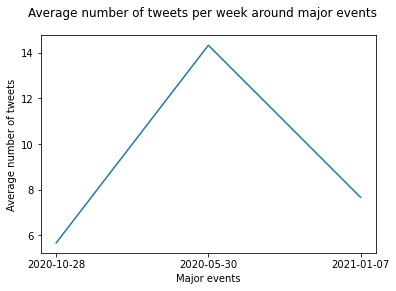

In [351]:
major_events = ["2020-10-28", "2020-05-30", "2021-01-07"]

#Calculating the average number of tweets around the given major events dates
#in the window frame of the dates

value_returned = []
for item in major_events:
    date_1 = datetime.datetime.strptime(item, '%Y-%m-%d')
    date_2= datetime.date.strftime(date_1, "%y/%m/%d")
    print(date_2)
    value_returned.append(get_tweets_daterange('elonmusk',date_2,14,7))

print(value_returned[1])

#Converting the list into numpy array to extract values of a single column
    
import numpy as np
B = np.array(value_returned)
print(B[:,0])
avg_count_per_week=(B[:,0]) 
    
#Plotting the graph of major events vs Avg number of tweets

import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.plot(major_events,avg_count_per_week)
plt.suptitle('Average number of tweets per week around major events')
plt.xlabel('Major events')
plt.ylabel('Average number of tweets')

# Task 5
Repeat the steps for Task 4, but this time plot the data based on average characters/week for each daterange.

For the major events you should get `[435.0, 1259.0, 575.6666666666666]`

20/10/28
Date Entered: 2020-10-28 00:00:00
Date 14 days before date 2020-10-14 00:00:00
Date 7 days after date 2020-11-04 00:00:00
Total number of tweets in the time period: 17
Average number of tweets per weeks are : 5.666666666666667


<ipython-input-342-4463a42e1b78>:41: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  result_count = doc.count()


Average number of characters per weeks are : 434.6666666666667
20/05/30
Date Entered: 2020-05-30 00:00:00
Date 14 days before date 2020-05-16 00:00:00
Date 7 days after date 2020-06-06 00:00:00
Total number of tweets in the time period: 43
Average number of tweets per weeks are : 14.333333333333334
Average number of characters per weeks are : 1258.6666666666667
21/01/07
Date Entered: 2021-01-07 00:00:00
Date 14 days before date 2020-12-24 00:00:00
Date 7 days after date 2021-01-14 00:00:00
Total number of tweets in the time period: 23
Average number of tweets per weeks are : 7.666666666666667
Average number of characters per weeks are : 575.3333333333334
(14.333333333333334, 1258.6666666666667)
[[   5.66666667  434.66666667]
 [  14.33333333 1258.66666667]
 [   7.66666667  575.33333333]]
[ 434.66666667 1258.66666667  575.33333333]


Text(0, 0.5, 'Average number of characters per week')

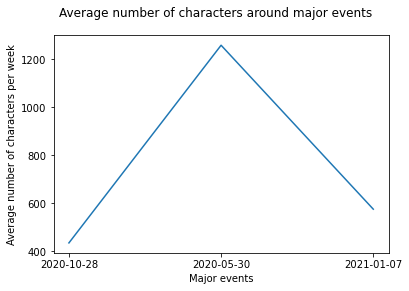

In [352]:
major_events = ["2020-10-28", "2020-05-30", "2021-01-07"]
value_returned_char = []

#fetching the average number of characters per week on major events

for item in major_events:
    date_1 = datetime.datetime.strptime(item, '%Y-%m-%d')
    date_2= datetime.date.strftime(date_1, "%y/%m/%d")
    print(date_2)
    value_returned_char.append(get_tweets_daterange('elonmusk',date_2,14,7))

    
print(value_returned_char[1])

#Converting the values to numpy array so as to access a single column

import numpy as np
A = np.array(value_returned_char)
print(A)
print(A[:,1])

avg_chara_per_week=(A[:,1]) 

#Plotting the graphs for avergae number of characters per week vs the major events that occured 

import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.plot(major_events,avg_chara_per_week)
plt.suptitle('Average number of characters around major events')
plt.xlabel('Major events')
plt.ylabel('Average number of characters per week')

## Task 6
Answer the following questions in the cell below using markdown.
 1. From the data, do you believe Elon was more/less active during major events? Please support your position using evidence from the previous tasks.
 2. What could we do to improve this experiment?
   - Your response could talk about data collection/aggregation, method of analysis, etc.

Your response:

1. So as per the data obtained we can see that during major events which were primarily Oct 28,May 30 and January7 we can see that the average count of tweets from elon musk during approximately per weeks sorrounding these events was 5.6,14.3, and 7.6 which roughly means that Elon musk is less active during the major events because 5.6 tweets per week mean that he is tweeting maximum one tweet per day or may be maximum two tweets aorund the major event of May 30 so these tweets are actually less than the usual per week tweets that he does around random dates which range anywhere near 16.0 on Nov 9 to 6.0 on Oct 26. So yes Elon musk does stay less active near the main events.
2. We can improve this experiment by add more sources of data like it might be possible that during the main events Elon musk gives more interviews on youtube or to news channels instead of tweeting. So we should look out for other occurances of his activities over the internet like his newly uploaded Interview Transcripts as that will lead to further improvement in our experiment. 